In [11]:
import pandas as pd
import numpy as np

## Pandas pivot table
- index, columns, values, aggfunc

In [4]:
df = pd.read_excel('../data/02. sales-funnel.xlsx')
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


#### index 설정

In [6]:
#Name 컬럼을 인덱스로 설정
#pd.pivot_table(df, index = "Name")
df.pivot_table(index = "Name")

C:\Users\nabi4\AppData\Local\Temp\ipykernel_9928\1753660974.py:3: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df.pivot_table(index = "Name")


,Account,Price,Quantity
Name,,,
Barton LLC,740150,35000,1.000000
"Fritsch, Russel and Anderson",737550,35000,1.000000
Herman LLC,141962,65000,2.000000
Jerde-Hilpert,412290,5000,2.000000
"Kassulke, Ondricka and Metz",307599,7000,3.000000
Keeling LLC,688981,100000,5.000000
Kiehn-Spinka,146832,65000,2.000000
Koepp Ltd,729833,35000,2.000000
Kulas Inc,218895,25000,1.500000


In [7]:
# 멀티 인덱스 설정
df.pivot_table(index = ["Name", "Rep", "Manager"])

C:\Users\nabi4\AppData\Local\Temp\ipykernel_9928\3926108304.py:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df.pivot_table(index = ["Name", "Rep", "Manager"])


,,,Account,Price,Quantity
Name,Rep,Manager,,,
Barton LLC,John Smith,Debra Henley,740150,35000,1.000000
"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,737550,35000,1.000000
Herman LLC,Cedric Moss,Fred Anderson,141962,65000,2.000000
Jerde-Hilpert,John Smith,Debra Henley,412290,5000,2.000000
"Kassulke, Ondricka and Metz",Wendy Yule,Fred Anderson,307599,7000,3.000000
Keeling LLC,Wendy Yule,Fred Anderson,688981,100000,5.000000
Kiehn-Spinka,Daniel Hilton,Debra Henley,146832,65000,2.000000
Koepp Ltd,Wendy Yule,Fred Anderson,729833,35000,2.000000
Kulas Inc,Daniel Hilton,Debra Henley,218895,25000,1.500000


#### values 설정

In [8]:
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [9]:
df.pivot_table(index = ['Manager', "Rep"], values = "Price")

Price
Manager       Rep                        
Debra Henley  Craig Booker   20000.000000
              Daniel Hilton  38333.333333
              John Smith     20000.000000
Fred Anderson Cedric Moss    27500.000000
              Wendy Yule     44250.000000

In [12]:
#Price 컬럼 sum 연산 적용
df.pivot_table(index = ['Manager', "Rep"], values = "Price", aggfunc = np.sum)

Price
Manager       Rep                  
Debra Henley  Craig Booker    80000
              Daniel Hilton  115000
              John Smith      40000
Fred Anderson Cedric Moss    110000
              Wendy Yule     177000

In [13]:
df.pivot_table(index = ['Manager', "Rep"], values = "Price", aggfunc = [np.sum, len])

sum   len
                              Price Price
Manager       Rep                        
Debra Henley  Craig Booker    80000     4
              Daniel Hilton  115000     3
              John Smith      40000     2
Fred Anderson Cedric Moss    110000     4
              Wendy Yule     177000     4

#### columns 설정

In [14]:
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [16]:
#Product 를 컬럼으로 지정
df.pivot_table(index = ['Manager', "Rep"], values = "Price", columns = "Product", aggfunc = np.sum)

Product                           CPU  Maintenance  Monitor  Software
Manager       Rep                                                    
Debra Henley  Craig Booker    65000.0       5000.0      NaN   10000.0
              Daniel Hilton  105000.0          NaN      NaN   10000.0
              John Smith      35000.0       5000.0      NaN       NaN
Fred Anderson Cedric Moss     95000.0       5000.0      NaN   10000.0
              Wendy Yule     165000.0       7000.0   5000.0       NaN

In [17]:
# Nan 값 설정 : fill_value
df.pivot_table(index = ['Manager', "Rep"], values = "Price", 
               columns = "Product", aggfunc = np.sum, fill_value = 0)

Product                         CPU  Maintenance  Monitor  Software
Manager       Rep                                                  
Debra Henley  Craig Booker    65000         5000        0     10000
              Daniel Hilton  105000            0        0     10000
              John Smith      35000         5000        0         0
Fred Anderson Cedric Moss     95000         5000        0     10000
              Wendy Yule     165000         7000     5000         0

In [18]:
#2개 이상 index, values 설정
df.pivot_table(index = ['Manager', "Rep", "Product"], values = ["Price", "Quantity"],
              aggfunc = np.sum, fill_value = 0)

Price  Quantity
Manager       Rep           Product                      
Debra Henley  Craig Booker  CPU           65000         2
                            Maintenance    5000         2
                            Software      10000         1
              Daniel Hilton CPU          105000         4
                            Software      10000         1
              John Smith    CPU           35000         1
                            Maintenance    5000         2
Fred Anderson Cedric Moss   CPU           95000         3
                            Maintenance    5000         1
                            Software      10000         1
              Wendy Yule    CPU          165000         7
                            Maintenance    7000         3
                            Monitor        5000         2

In [20]:
#aggfunc 2개 이상 설정
df.pivot_table(
    index = ['Manager', "Rep", "Product"], 
    values = ["Price", "Quantity"],
    aggfunc = [np.sum, np.mean], 
    fill_value = 0,
    margins = True #총계(All) 추가
)

sum                   mean  \
                                          Price Quantity         Price   
Manager       Rep           Product                                      
Debra Henley  Craig Booker  CPU           65000        2  32500.000000   
                            Maintenance    5000        2   5000.000000   
                            Software      10000        1  10000.000000   
              Daniel Hilton CPU          105000        4  52500.000000   
                            Software      10000        1  10000.000000   
              John Smith    CPU           35000        1  35000.000000   
                            Maintenance    5000        2   5000.000000   
Fred Anderson Cedric Moss   CPU           95000        3  47500.000000   
                            Maintenance    5000        1   5000.000000   
                            Software      10000        1  10000.000000   
              Wendy Yule    CPU          165000        7  82500.000000   
                            Maintenance    7000        3   7000.000000   
                            Monitor        5000        2   5000.000000   
All                                      522000       30  30705.882353   

                                                   
                                         Quantity  
Manager       Rep           Product                
Debra Henley  Craig Booker  CPU          1.000000  
                            Maintenance  2.000000  
                            Software     1.000000  
              Daniel Hilton CPU          2.000000  
                            Software     1.000000  
              John Smith    CPU          1.000000  
                            Maintenance  2.000000  
Fred Anderson Cedric Moss   CPU          1.500000  
                            Maintenance  1.000000  
                            Software     1.000000  
              Wendy Yule    CPU          3.500000  
                            Maintenance  3.000000  
                            Monitor      2.000000  
All                                      1.764706

---

### Python 반복문

#### 간단한 for문

In [21]:
for n in [1,2,3,4]:
    print("Number is", n)

Number is 1
Number is 2
Number is 3
Number is 4


In [22]:
for n in range(0,10):
    print(n ** 2)

0
1
4
9
16
25
36
49
64
81


#### 위 코드를 한줄로 : list comprehension

In [23]:
[n ** 2 for n in range(0,10)]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

## Pandas에 잘 맞춰진 반복문용 명령 iterrows()
- Pandas 데이터 프레임은 대부분 2차원
- 가독률 향상을 위해 iterrows() 옵션 사용하면 편리
- 인덱스와 내용을 나누어 받는것만 주의하기

---

## Seaborn

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

plt.rcParams['axes.unicode_minus'] = False 
rc("font", family = "Malgun Gothic")
get_ipython().run_line_magic("matplotlib", "inline")

#### 예제1. seaborn 기초

In [28]:
np.linspace(0,14,100)

array([ 0.        ,  0.14141414,  0.28282828,  0.42424242,  0.56565657,
        0.70707071,  0.84848485,  0.98989899,  1.13131313,  1.27272727,
        1.41414141,  1.55555556,  1.6969697 ,  1.83838384,  1.97979798,
        2.12121212,  2.26262626,  2.4040404 ,  2.54545455,  2.68686869,
        2.82828283,  2.96969697,  3.11111111,  3.25252525,  3.39393939,
        3.53535354,  3.67676768,  3.81818182,  3.95959596,  4.1010101 ,
        4.24242424,  4.38383838,  4.52525253,  4.66666667,  4.80808081,
        4.94949495,  5.09090909,  5.23232323,  5.37373737,  5.51515152,
        5.65656566,  5.7979798 ,  5.93939394,  6.08080808,  6.22222222,
        6.36363636,  6.50505051,  6.64646465,  6.78787879,  6.92929293,
        7.07070707,  7.21212121,  7.35353535,  7.49494949,  7.63636364,
        7.77777778,  7.91919192,  8.06060606,  8.2020202 ,  8.34343434,
        8.48484848,  8.62626263,  8.76767677,  8.90909091,  9.05050505,
        9.19191919,  9.33333333,  9.47474747,  9.61616162,  9.75

In [30]:
x = np.linspace(0,14,100)
y1 = np.sin(x)
y2 = 2 * np.sin(x + 0.5)
y3 = 3 * np.sin(x + 1.0)
y4 = 4 * np.sin(x + 1.5)

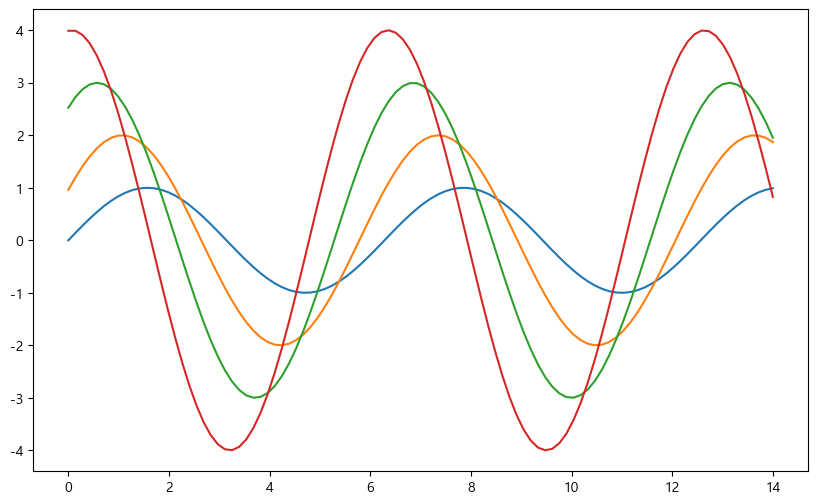

In [31]:
plt.figure(figsize = (10,6))
plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.show()

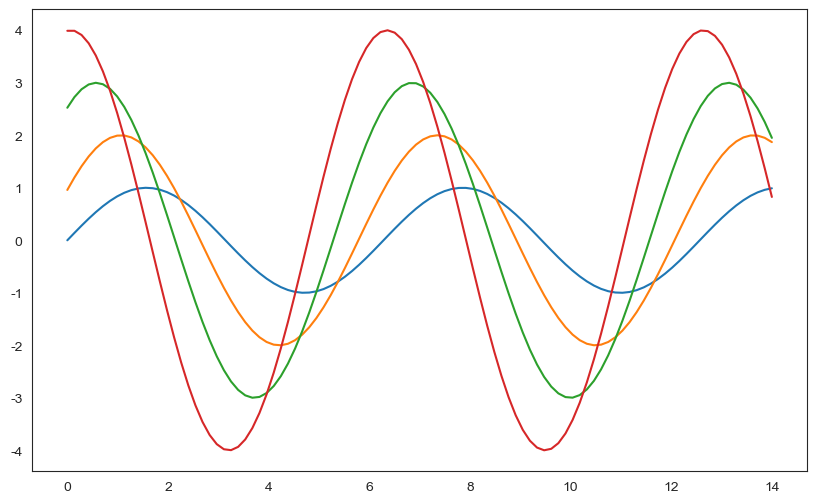

In [32]:
# sns.set_style()
# "white", "dark", "whitegrid", "darkgrid"
sns.set_style("white")
plt.figure(figsize = (10,6))
plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.show()

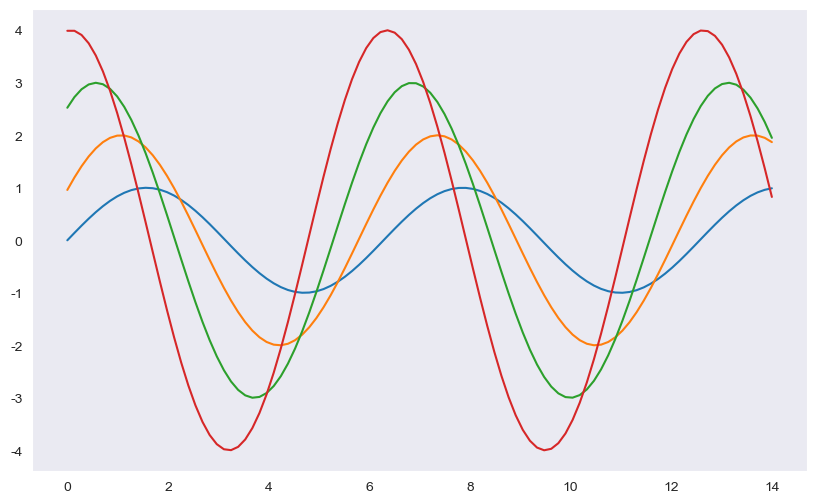

In [34]:
# sns.set_style()

sns.set_style("dark")
plt.figure(figsize = (10,6))
plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.show()

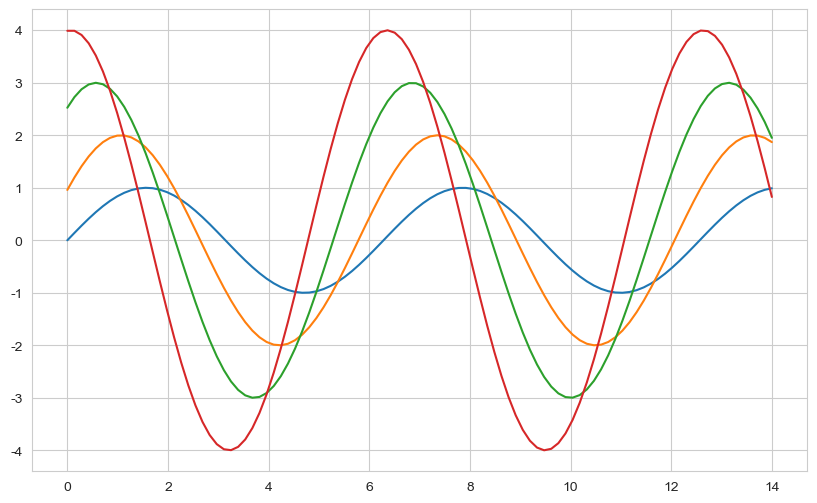

In [35]:
# sns.set_style()

sns.set_style("whitegrid")
plt.figure(figsize = (10,6))
plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.show()

#### 예제2. seaborn tips data
- boxplot
- swarmplot
- implot

In [36]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [38]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


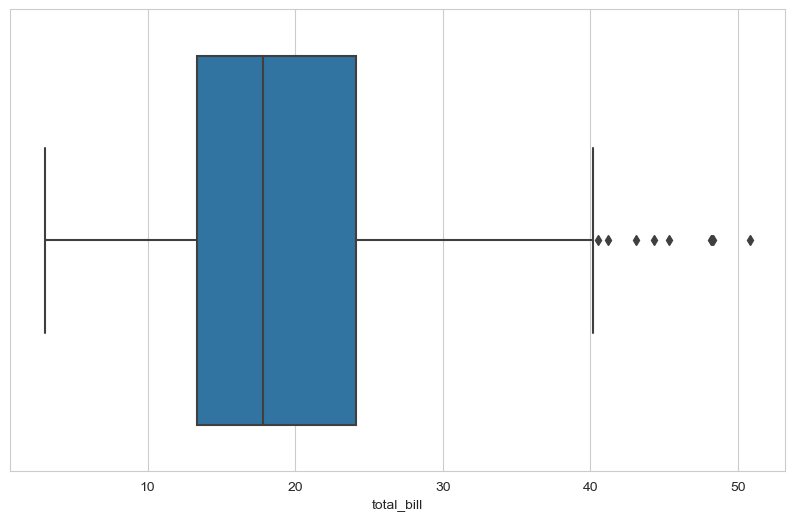

In [40]:
#boxplot
plt.figure(figsize = (10,6))
sns.boxplot(x = tips["total_bill"])
plt.show()

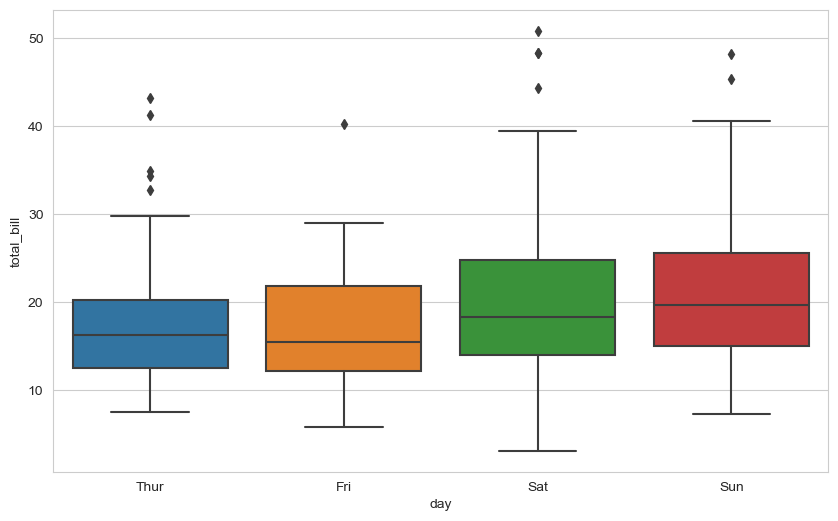

In [42]:
#boxplot
plt.figure(figsize = (10,6))
sns.boxplot(x = "day",y = "total_bill", data = tips)
plt.show()

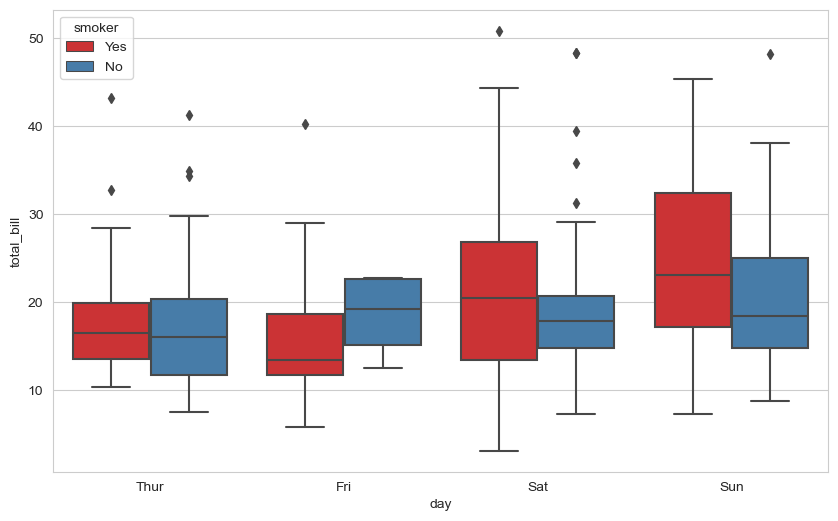

In [45]:
# boxplot hue(카테고리 변수를 집어넣어주면 해당 변수에 따른 그래프를 나눠 그려줌), 
# platte(색깔 지정) option

plt.figure(figsize = (10,6))
sns.boxplot(x = "day", y = "total_bill", data = tips, hue = "smoker", palette = "Set1")
plt.show()

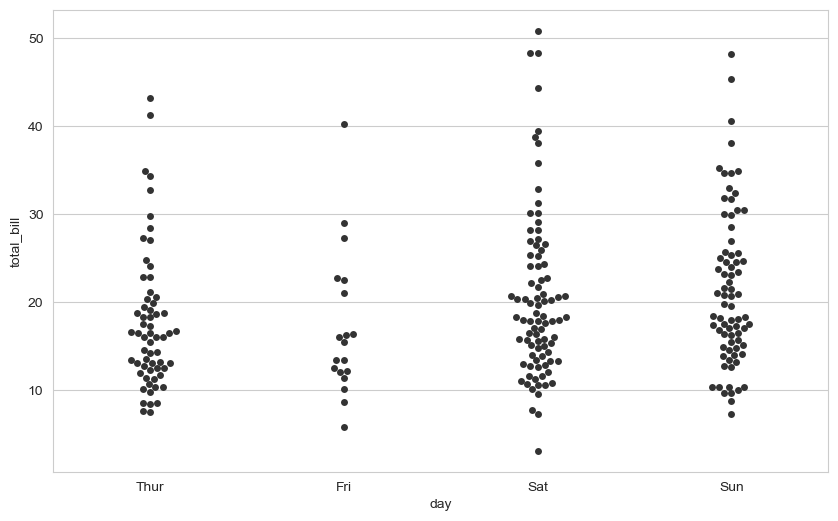

In [46]:
# swarmplot(산점도)
# color 0(검은색)~1(흰색) 색깔 옵션

plt.figure(figsize = (10,6))
sns.swarmplot(x = "day", y = "total_bill", data = tips, color = "0.2")
plt.show()

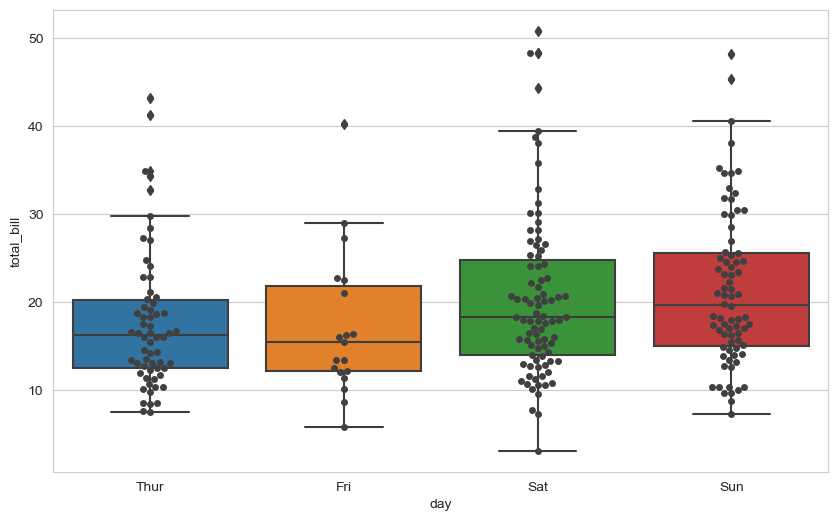

In [48]:
# boxplot with swarmplot

plt.figure(figsize = (10,6))
sns.boxplot(x = "day", y = "total_bill", data = tips)
sns.swarmplot(x = "day", y = "total_bill", data = tips, color = "0.25")
plt.show()

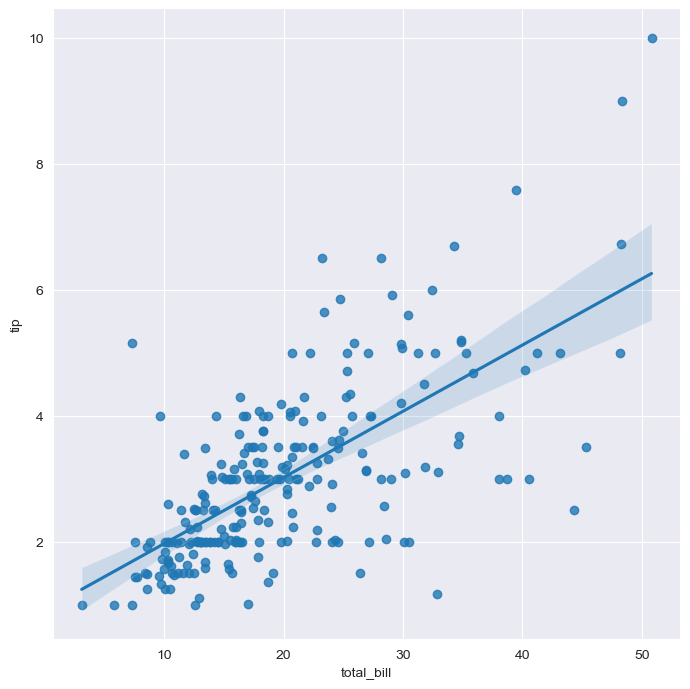

In [50]:
# lmplot : total_bill과 tip 사이 관계 파악

sns.set_style("darkgrid")
sns.lmplot(x = "total_bill", y = "tip", data= tips, height = 7)
plt.show()

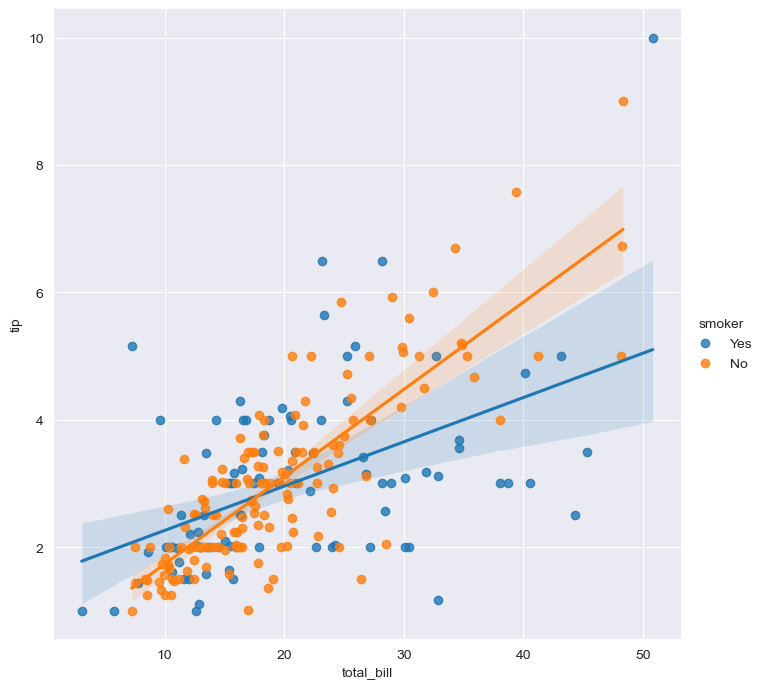

In [51]:
# hue option

sns.set_style("darkgrid")
sns.lmplot(x = "total_bill", y = "tip", data = tips, height = 7, hue = "smoker")
plt.show()

#### 예제3. flights data
- heatmap

In [53]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [54]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [55]:
# pivot
# index, colunms, values
flights = flights.pivot(index = "month", columns = "year", values = "passengers")
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


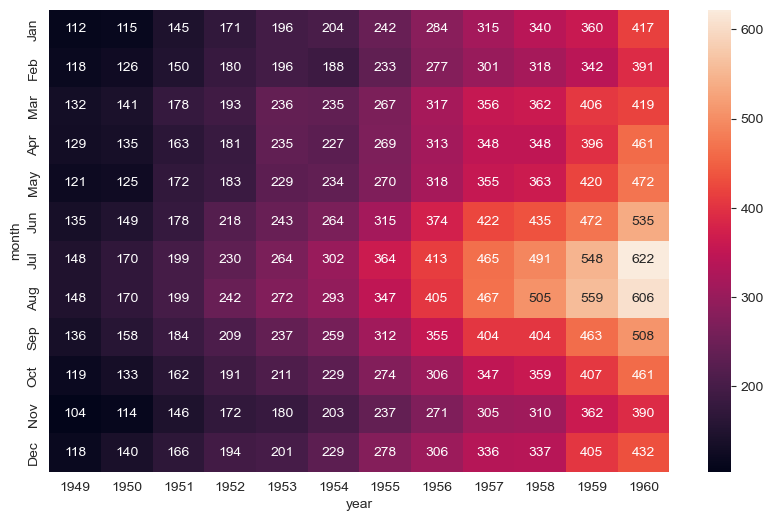

In [59]:
# heatmap
# annot : 데이터 값 표시 옵션 , fmt = 'd' : 정수
plt.figure(figsize = (10,6))
sns.heatmap(data = flights, annot = True, fmt = "d")
plt.show()

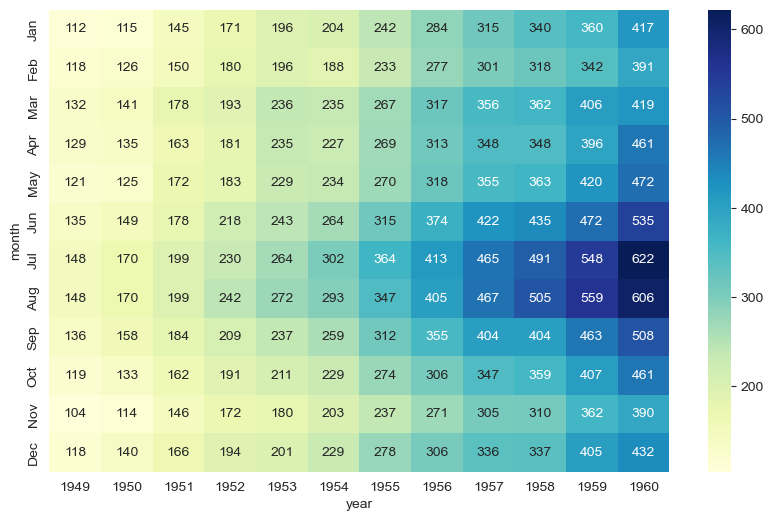

In [61]:
# colormap

plt.figure(figsize = (10,6))
sns.heatmap(flights, annot = True, fmt= "d", cmap = "YlGnBu")
plt.show()

#### 예제4. iris data
- pairplot

In [62]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


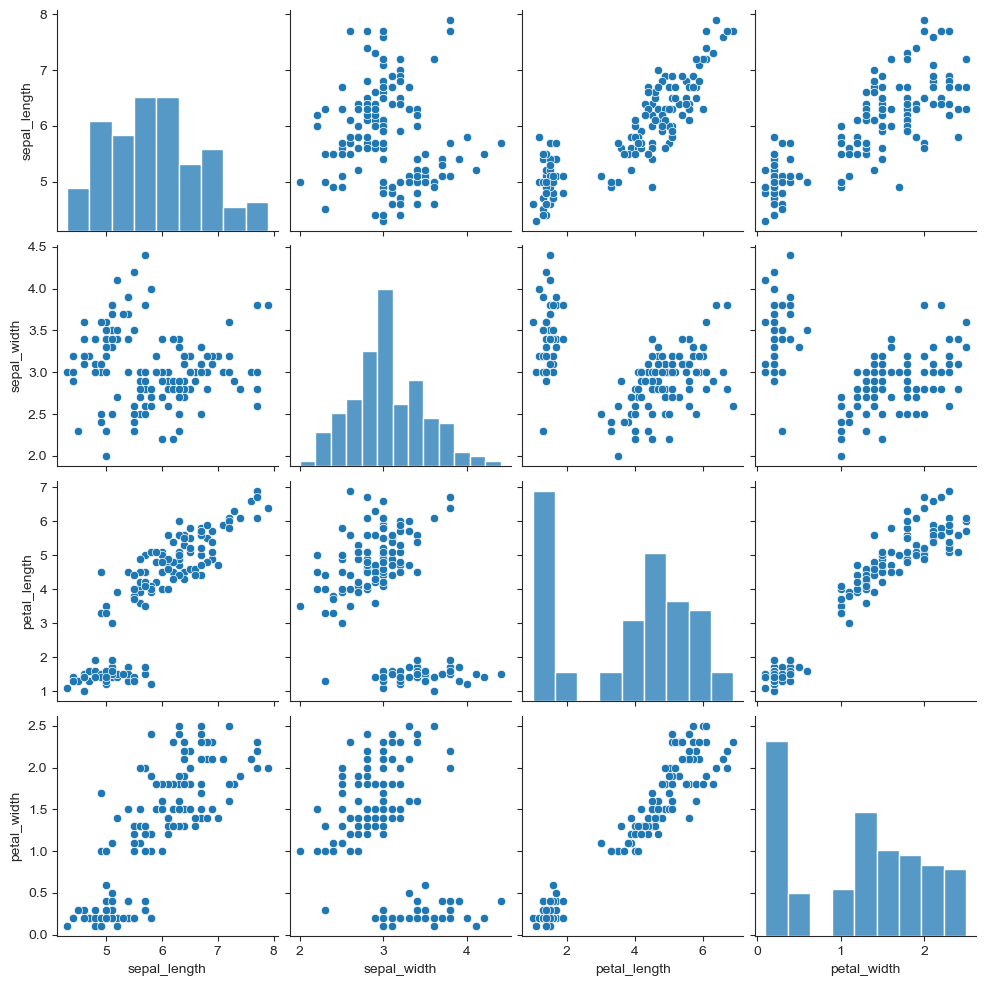

In [66]:
# pairplot : 모든 경우의 수의 pairplot

sns.set_style("ticks")
sns.pairplot(iris)
plt.show()

In [67]:
iris["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

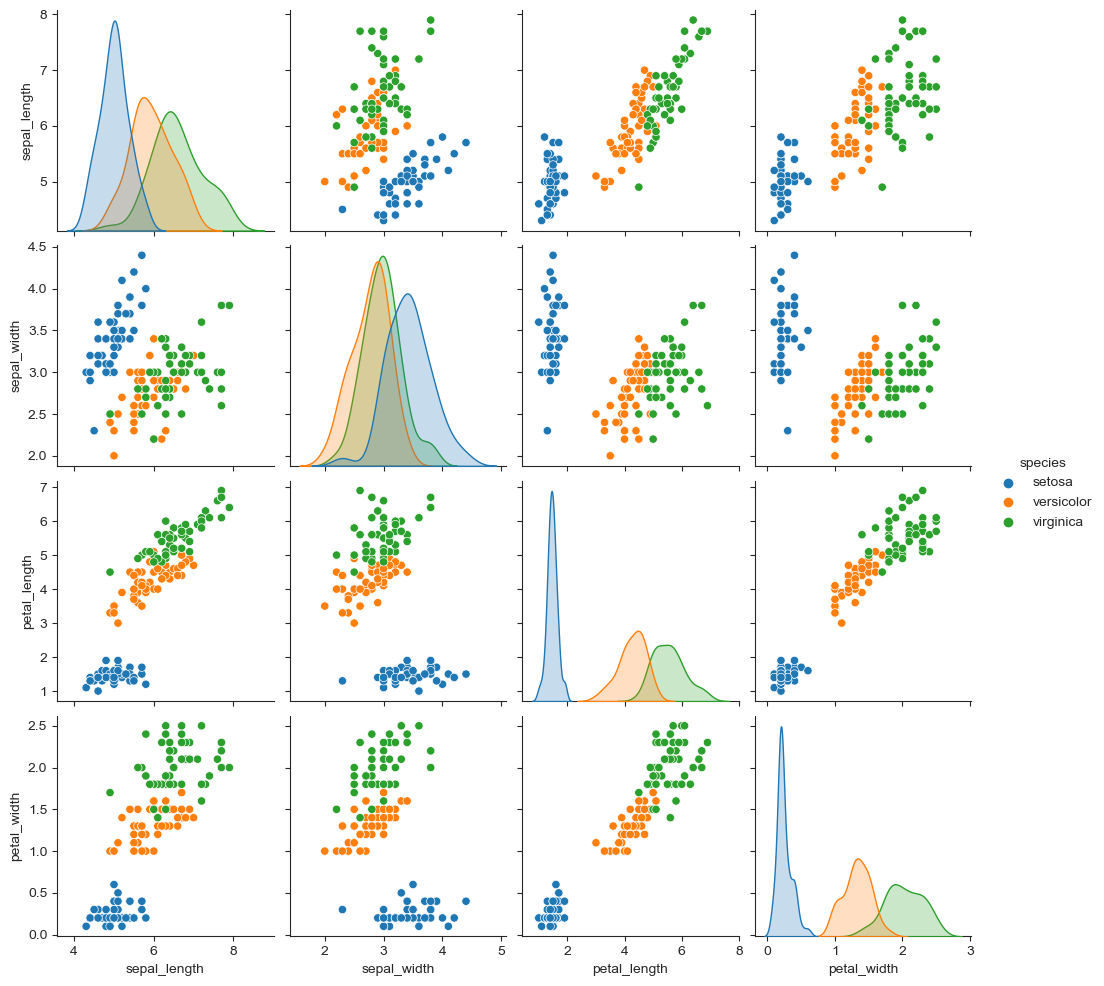

In [68]:
# hue

sns.pairplot(iris, hue = "species")
plt.show()

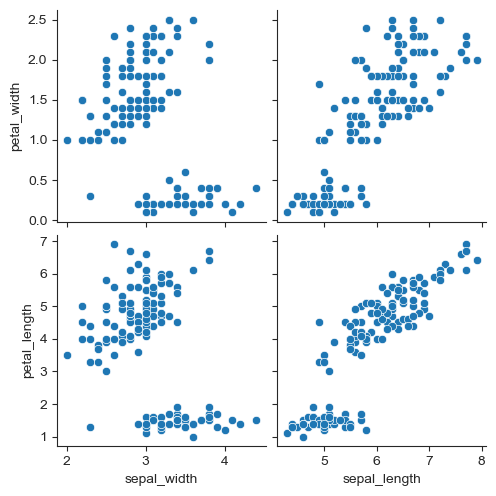

In [69]:
# 원하는 컬럼만 pairplt

sns.pairplot(iris, x_vars = ["sepal_width", "sepal_length"],
            y_vars = ['petal_width', "petal_length"])
plt.show()

#### 예제5. anscombe data
- lmplot

In [70]:
anscombie = sns.load_dataset("anscombe")
anscombie.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [71]:
anscombie["dataset"].unique()

array(['I', 'II', 'III', 'IV'], dtype=object)

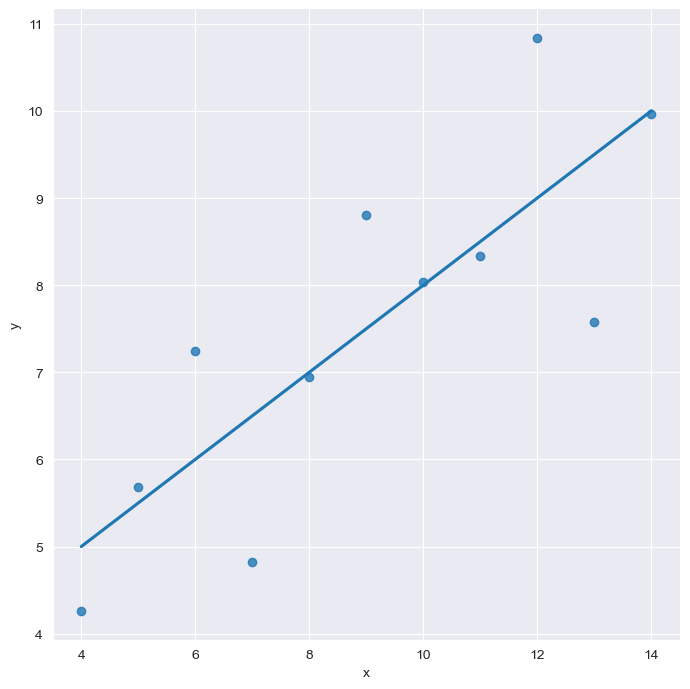

In [72]:
sns.set_style("darkgrid")
sns.lmplot(x = "x", y ="y", data = anscombie.query("dataset == 'I'"), 
          ci = None, height = 7) #ci : 신뢰구간 선택
plt.show()

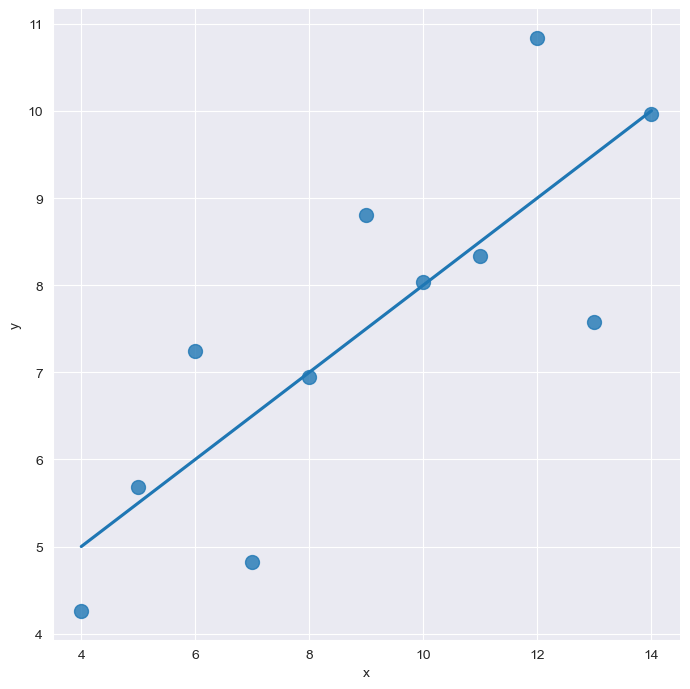

In [76]:
sns.set_style("darkgrid")
sns.lmplot(x = "x", y ="y", data = anscombie.query("dataset == 'I'"), 
          ci = None, height = 7, scatter_kws = {"s" : 100}) #ci : 신뢰구간 선택, scatter_kws : 원 크기
plt.show()

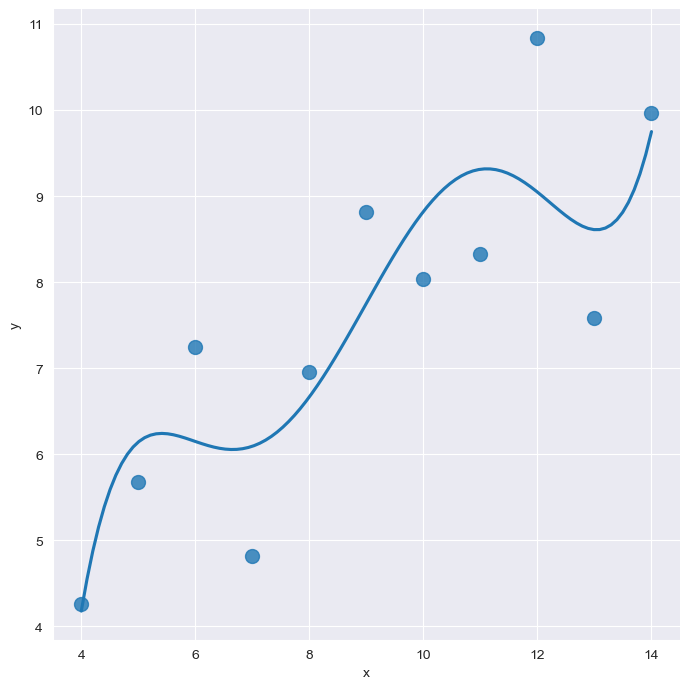

In [79]:
# order option
sns.set_style("darkgrid")
sns.lmplot(
    x = "x", y ="y", data = anscombie.query("dataset == 'I'"), 
    ci = None, height = 7, scatter_kws = {"s" : 100},
    order = 5) 
#order : 
plt.show()

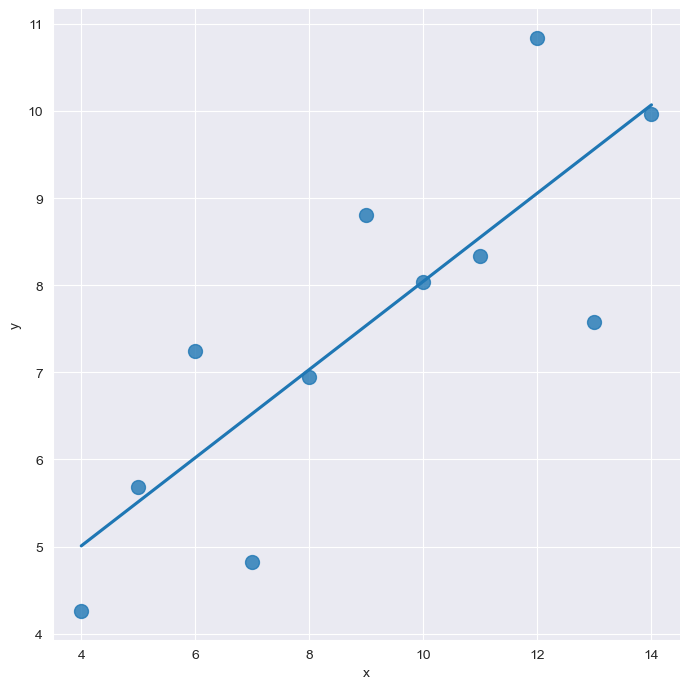

In [82]:
# outlier
sns.set_style("darkgrid")
sns.lmplot(
    x = "x", y ="y", data = anscombie.query("dataset == 'I'"), 
    ci = None, height = 7, scatter_kws = {"s" : 100},
    robust = True) 
#robust = True : 이상치를 제외하고 선형회귀를 그림
plt.show()